In [1]:
#A&D tech final project

In [2]:
#import necessary libraries
#pandas for dataset management
import pandas as pd
#matplotlib and seaborn for plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#import tensorflow for neural network training
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
#Sklearn for model evaluation
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#numpy
import numpy as np
#to save the model
import joblib

In [3]:
#reading the .csv dataset and assigning a dataframe
telco = pd.read_csv("Datasets/Kaggle/Telco Customer Churn/archive(1)/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
#no of dupes
print(telco.duplicated().sum())

0


In [5]:
#no duplicates

In [6]:
#data inspection

In [7]:
#viewing the first and last 5 rows
print(telco)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [8]:
#dataframe info
print(telco.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
#there are no apparent null entries here

In [10]:
#viewing the dataset description
print(telco.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [11]:
#there are many non-numerical/categorical columns, we have to convert them to numerical format

In [12]:
#checking value counts to analyze the category classes

In [13]:
#customerID value counts
print(telco['customerID'].value_counts())

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64


In [14]:
#the customerIDs are unique, although this data is not useful for the model

In [15]:
#gender value counts
print(telco['gender'].value_counts())

gender
Male      3555
Female    3488
Name: count, dtype: int64


In [16]:
#only two types, good

In [17]:
#SeniorCitizen value counts
print(telco['SeniorCitizen'].value_counts())

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


In [18]:
#binary, good

In [19]:
#Partner value counts
print(telco['Partner'].value_counts())

Partner
No     3641
Yes    3402
Name: count, dtype: int64


In [20]:
#also binary, good (whether the customer has a partner or not)

In [21]:
#Dependents value counts
print(telco['Dependents'].value_counts())

Dependents
No     4933
Yes    2110
Name: count, dtype: int64


In [22]:
#binary, good

In [23]:
#tenure value counts
print(telco['tenure'].value_counts())

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64


In [24]:
#73 diff categories (numerical though)

In [25]:
#PhoneService value counts
print(telco['PhoneService'].value_counts())

PhoneService
Yes    6361
No      682
Name: count, dtype: int64


In [26]:
#binary, good

In [27]:
#MultipleLines value counts
print(telco['MultipleLines'].value_counts())

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


In [28]:
#3 categories, good

In [29]:
#InternetService value counts
print(telco['InternetService'].value_counts())

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


In [30]:
#3 categories, good

In [31]:
#OnlineSecurity value counts
print(telco['OnlineSecurity'].value_counts())

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


In [32]:
#3 categories, good

In [33]:
#OnlineBackup value counts
print(telco['OnlineBackup'].value_counts())

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


In [34]:
#3 categories, good

In [35]:
#DeviceProtection value counts
print(telco['DeviceProtection'].value_counts())

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64


In [36]:
#3 categories, good

In [37]:
#TechSupport value counts
print(telco['TechSupport'].value_counts())

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64


In [38]:
#3 categories, good

In [39]:
#StreamingTV value counts
print(telco['StreamingTV'].value_counts())

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64


In [40]:
#3 categories, good

In [41]:
#StreamingMovies value counts
print(telco['StreamingMovies'].value_counts())

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64


In [42]:
#3 categories, good

In [43]:
#Contract value counts
print(telco['Contract'].value_counts())

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


In [44]:
#3 categories, good (contract type)

In [45]:
#PaperlessBilling value counts
print(telco['PaperlessBilling'].value_counts())

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64


In [46]:
#binary, good

In [47]:
#PaymentMethod value counts
print(telco['PaymentMethod'].value_counts())

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


In [48]:
#4 categories, good

In [49]:
#MonthlyCharges value counts
print(telco['MonthlyCharges'].value_counts())

MonthlyCharges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: count, Length: 1585, dtype: int64


In [50]:
#numerical data, 1585 unique values

In [51]:
#TotalCharges value counts
print(telco['TotalCharges'].value_counts())

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64


In [52]:
#numerical data, but what is that first thing, is it null?

In [53]:
#ChurnChurn value counts
print(telco['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [54]:
#binary, good

In [55]:
#we have to
#convert the binary data into one-hot
#convert the data that has more than 2 categories into label encodeing

In [56]:
# Identify non-numeric values
non_numeric = telco['TotalCharges'][pd.to_numeric(telco['TotalCharges'], errors='coerce').isna()]
print(non_numeric)

488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object


In [57]:
#huh, those are numbers
#there are not too many of them, I can just replace them manually

In [58]:
#mapping the values to be replaced
mapping = {'488': 488, '753': 753, '936': 936, '1082': 1082, '1340': 1340, '3331': 3331, '3826': 3826, '4380': 4380, '5218': 5218, '6670': 6670, '6754': 6754}

# Replace using the mapping
telco['TotalCharges'] = telco['TotalCharges'].replace(mapping)

#we fix the missing ' ' values by replacing them with the null to perform conversion to numerical smoothly
telco['TotalCharges'] = telco['TotalCharges'].replace(' ', np.nan)

# Convert to numeric
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'])

print(telco['TotalCharges'])

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64


In [59]:
#fix the null values in TotalCharges
#we fix the missing/null values by replacing them with the mean (average) of the remaining column since TotalCharges is numrical
telco['TotalCharges'] = telco['TotalCharges'].replace(' ', telco['TotalCharges'].mean())

In [60]:
#TotalCharges value counts again
print(telco['TotalCharges'].value_counts())

TotalCharges
20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: count, Length: 6530, dtype: int64


In [61]:
#no null values, int datatype, all seems good

In [62]:
#dropping the CustomerID column as it is useless for the model training
telco2 = telco.drop(columns=['customerID'])

In [63]:
#dataframe info and description again
print(telco2.info())
print(telco2.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [64]:
#looks better

In [65]:
#encoding procedure

In [66]:
#getting columns with 3-4 unique categories for label encoding
# Set the desired number of unique categories
desired_categories = [3, 4]

# Identify the columns that have either 3 or 4 unique values
columns_lab = [col for col in telco2.columns if telco2[col].nunique() in desired_categories]

print(columns_lab)

['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


In [67]:
#backup
telco3 = telco2
#label encoding:
label_encoder = LabelEncoder()
telco3['MultipleLines'] = label_encoder.fit_transform(telco2['MultipleLines'])
telco3['InternetService'] = label_encoder.fit_transform(telco2['InternetService'])
telco3['OnlineSecurity'] = label_encoder.fit_transform(telco2['OnlineSecurity'])
telco3['OnlineBackup'] = label_encoder.fit_transform(telco2['OnlineBackup'])
telco3['DeviceProtection'] = label_encoder.fit_transform(telco2['DeviceProtection'])
telco3['TechSupport'] = label_encoder.fit_transform(telco2['TechSupport'])
telco3['StreamingTV'] = label_encoder.fit_transform(telco2['StreamingTV'])
telco3['StreamingMovies'] = label_encoder.fit_transform(telco2['StreamingMovies'])
telco3['Contract'] = label_encoder.fit_transform(telco2['Contract'])
telco3['PaymentMethod'] = label_encoder.fit_transform(telco2['PaymentMethod'])
print(telco3)

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0               0             2   
1      

In [68]:
#getting columns with 2 unique categories (binary) for one hot encoding

# Identify the columns that have 2 unique values
columns_oh = [col for col in telco3.columns if telco3[col].nunique() == 2]

print(columns_oh)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']


In [69]:
#ignore senior citizen as its already numerical

In [70]:
#one hot encoding and dropping redundant columns
telco_oh = pd.get_dummies(telco3[['gender','Partner','Dependents','PhoneService','PaperlessBilling','Churn']], drop_first=True)

print(telco_oh)

      gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0           False         True           False             False   
1            True        False           False              True   
2            True        False           False              True   
3            True        False           False             False   
4           False        False           False              True   
...           ...          ...             ...               ...   
7038         True         True            True              True   
7039        False         True            True              True   
7040        False         True            True             False   
7041         True         True           False              True   
7042         True        False           False              True   

      PaperlessBilling_Yes  Churn_Yes  
0                     True      False  
1                    False      False  
2                     True       True  
3                    Fa

In [71]:
#backup
telco4 = telco3.copy()
# Concatenate the original DataFrame with the one-hot encoded DataFrame
telco4 = pd.concat([telco3, telco_oh], axis=1)
print(telco4)

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
0                 1                0               0             2  ... 

In [72]:
#dropping the no longer necessary, pre-one-hot encoded columns
telco5 = telco4.drop(['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn'], axis=1)

In [73]:
#checking the results of our encoding
print(telco5.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SeniorCitizen         7043 non-null   int64  
 1   tenure                7043 non-null   int64  
 2   MultipleLines         7043 non-null   int32  
 3   InternetService       7043 non-null   int32  
 4   OnlineSecurity        7043 non-null   int32  
 5   OnlineBackup          7043 non-null   int32  
 6   DeviceProtection      7043 non-null   int32  
 7   TechSupport           7043 non-null   int32  
 8   StreamingTV           7043 non-null   int32  
 9   StreamingMovies       7043 non-null   int32  
 10  Contract              7043 non-null   int32  
 11  PaymentMethod         7043 non-null   int32  
 12  MonthlyCharges        7043 non-null   float64
 13  TotalCharges          7032 non-null   float64
 14  gender_Male           7043 non-null   bool   
 15  Partner_Yes          

In [74]:
#no more objects, but there is a null value in 'TotalCharges'

In [75]:
#using mean, fixing 'TotalCharges'
#backup
telco6 = telco5.copy()
#we fix the missing/null values by replacing them with the mean (average) of the remaining column since TotalCharges is numerical
telco6['TotalCharges'] = telco6['TotalCharges'].fillna(telco6['TotalCharges'].mean())

In [76]:
#checking the results of our nullfix
print(telco6.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SeniorCitizen         7043 non-null   int64  
 1   tenure                7043 non-null   int64  
 2   MultipleLines         7043 non-null   int32  
 3   InternetService       7043 non-null   int32  
 4   OnlineSecurity        7043 non-null   int32  
 5   OnlineBackup          7043 non-null   int32  
 6   DeviceProtection      7043 non-null   int32  
 7   TechSupport           7043 non-null   int32  
 8   StreamingTV           7043 non-null   int32  
 9   StreamingMovies       7043 non-null   int32  
 10  Contract              7043 non-null   int32  
 11  PaymentMethod         7043 non-null   int32  
 12  MonthlyCharges        7043 non-null   float64
 13  TotalCharges          7043 non-null   float64
 14  gender_Male           7043 non-null   bool   
 15  Partner_Yes          

In [77]:
#no nulls anymore

In [78]:
#first plots

In [79]:
#encoded backup
telcoen = telco6.copy()

<Axes: >

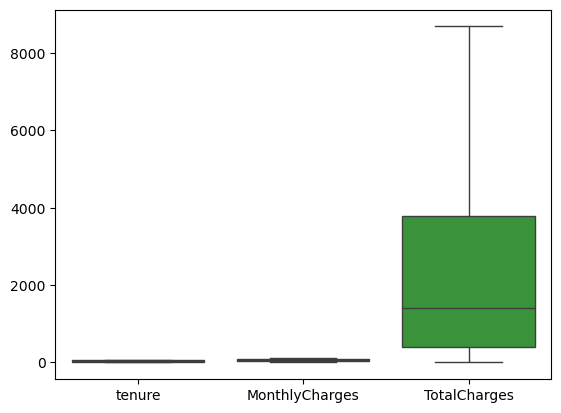

In [80]:
#outlier inspection boxplot, only the numerical columns
sns.boxplot(telcoen[['tenure', 'MonthlyCharges', 'TotalCharges']])

<Axes: >

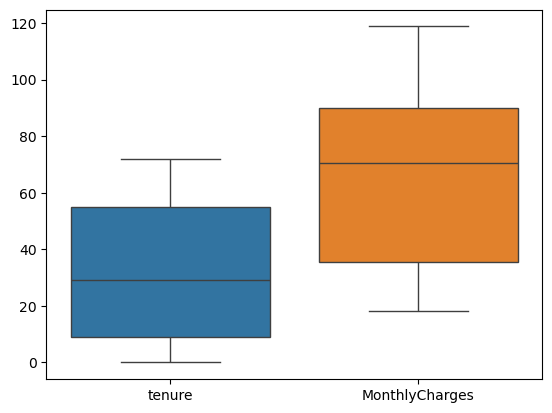

In [81]:
sns.boxplot(telcoen[['tenure', 'MonthlyCharges']])

<Axes: >

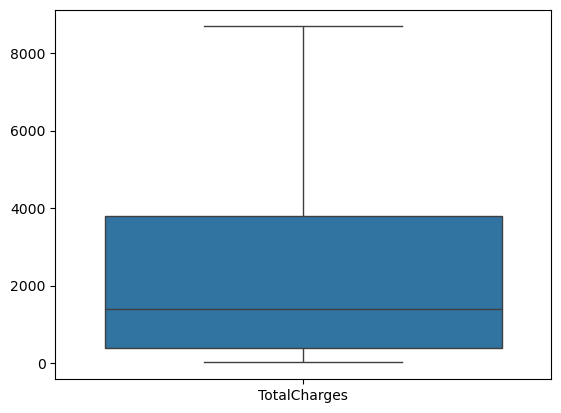

In [82]:
sns.boxplot(telcoen[['TotalCharges']])

In [83]:
#total charges may have some outliers, rest are good

In [84]:
#histograms, just cuz

(array([1612.,  759.,  570.,  556.,  495.,  494.,  452.,  495.,  501.,
        1109.]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <BarContainer object of 10 artists>)

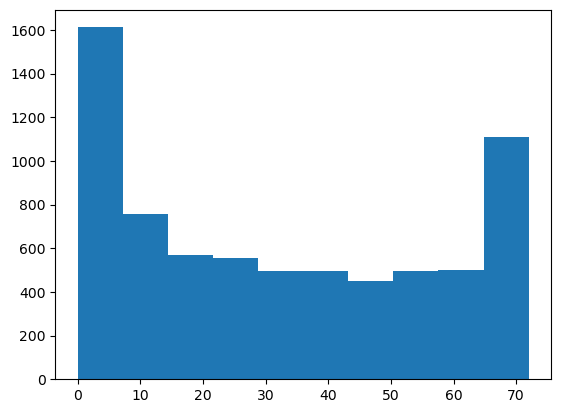

In [85]:
#tenure
plt.hist(telcoen['tenure'])

(array([1606.,  191.,  365.,  639.,  473.,  895.,  953.,  869.,  758.,
         294.]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <BarContainer object of 10 artists>)

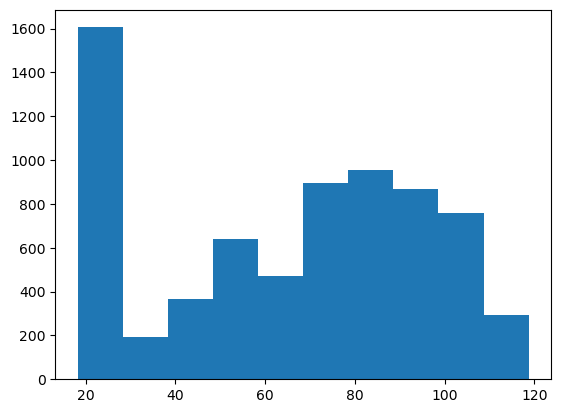

In [86]:
#MonthlyCharges
plt.hist(telcoen['MonthlyCharges'])

(array([2709., 1228.,  682.,  508.,  454.,  412.,  395.,  310.,  223.,
         122.]),
 array([  18.8,  885.4, 1752. , 2618.6, 3485.2, 4351.8, 5218.4, 6085. ,
        6951.6, 7818.2, 8684.8]),
 <BarContainer object of 10 artists>)

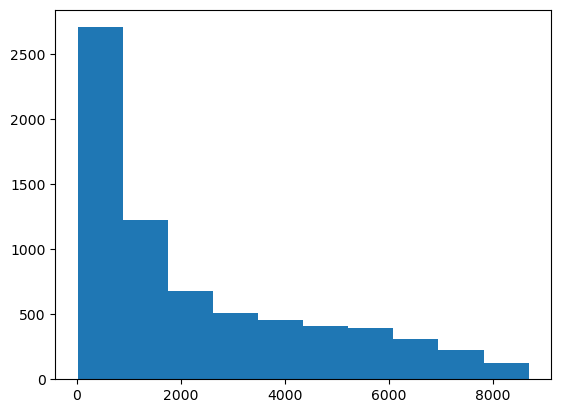

In [87]:
#TotalCharges
plt.hist(telcoen['TotalCharges'])

In [88]:
#outliers not too bad
#next up, standardization

In [89]:
#new backup
telcost = telcoen.copy()   #standardized + encoded

In [90]:
# Initialize the scaler
scaler = StandardScaler()

# Select numerical features to standardize
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Fit and transform the selected numerical columns
telcost[numerical_features] = scaler.fit_transform(telcoen[numerical_features])  #standardized + encoded

In [91]:
#viewing data the final preprocessed data

In [92]:
print(telco[['tenure', 'MonthlyCharges', 'TotalCharges']])
print(telcost[['tenure', 'MonthlyCharges', 'TotalCharges']])

      tenure  MonthlyCharges  TotalCharges
0          1           29.85         29.85
1         34           56.95       1889.50
2          2           53.85        108.15
3         45           42.30       1840.75
4          2           70.70        151.65
...      ...             ...           ...
7038      24           84.80       1990.50
7039      72          103.20       7362.90
7040      11           29.60        346.45
7041       4           74.40        306.60
7042      66          105.65       6844.50

[7043 rows x 3 columns]
        tenure  MonthlyCharges  TotalCharges
0    -1.277445       -1.160323     -0.994971
1     0.066327       -0.259629     -0.173876
2    -1.236724       -0.362660     -0.960399
3     0.514251       -0.746535     -0.195400
4    -1.236724        0.197365     -0.941193
...        ...             ...           ...
7038 -0.340876        0.665992     -0.129281
7039  1.613701        1.277533      2.242808
7040 -0.870241       -1.168632     -0.855182
7041 -1.1

In [93]:
#comparing the encoded+standardized and original data

In [94]:
print(telco[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())
print(telcost[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())

            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7032.000000
mean     32.371149       64.761692   2283.300441
std      24.559481       30.090047   2266.771362
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.850000   3794.737500
max      72.000000      118.750000   8684.800000
             tenure  MonthlyCharges  TotalCharges
count  7.043000e+03    7.043000e+03  7.043000e+03
mean  -2.421273e-17   -6.406285e-17  8.070910e-17
std    1.000071e+00    1.000071e+00  1.000071e+00
min   -1.318165e+00   -1.545860e+00 -9.998503e-01
25%   -9.516817e-01   -9.725399e-01 -8.305558e-01
50%   -1.372744e-01    1.857327e-01 -3.897629e-01
75%    9.214551e-01    8.338335e-01  6.637555e-01
max    1.613701e+00    1.794352e+00  2.826469e+00


<Axes: >

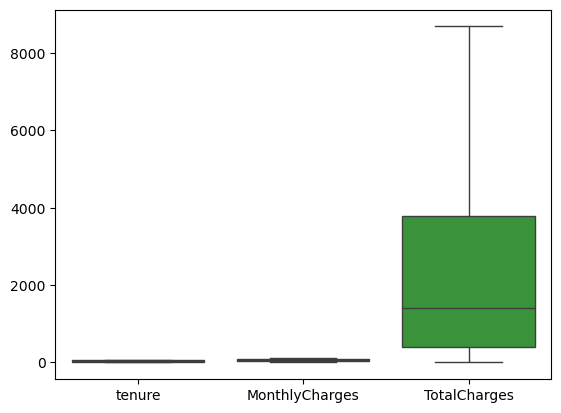

In [95]:
sns.boxplot(telco[['tenure', 'MonthlyCharges', 'TotalCharges']])

<Axes: >

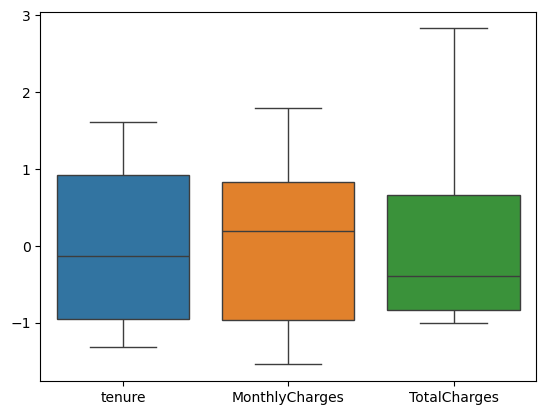

In [96]:
sns.boxplot(telcost[['tenure', 'MonthlyCharges', 'TotalCharges']])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'SeniorCitizen'),
  Text(1, 0, 'tenure'),
  Text(2, 0, 'MultipleLines'),
  Text(3, 0, 'InternetService'),
  Text(4, 0, 'OnlineSecurity'),
  Text(5, 0, 'OnlineBackup'),
  Text(6, 0, 'DeviceProtection'),
  Text(7, 0, 'TechSupport'),
  Text(8, 0, 'StreamingTV'),
  Text(9, 0, 'StreamingMovies'),
  Text(10, 0, 'Contract'),
  Text(11, 0, 'PaymentMethod'),
  Text(12, 0, 'MonthlyCharges'),
  Text(13, 0, 'TotalCharges'),
  Text(14, 0, 'gender_Male'),
  Text(15, 0, 'Partner_Yes'),
  Text(16, 0, 'Dependents_Yes'),
  Text(17, 0, 'PhoneService_Yes'),
  Text(18, 0, 'PaperlessBilling_Yes'),
  Text(19, 0, 'Churn_Yes')])

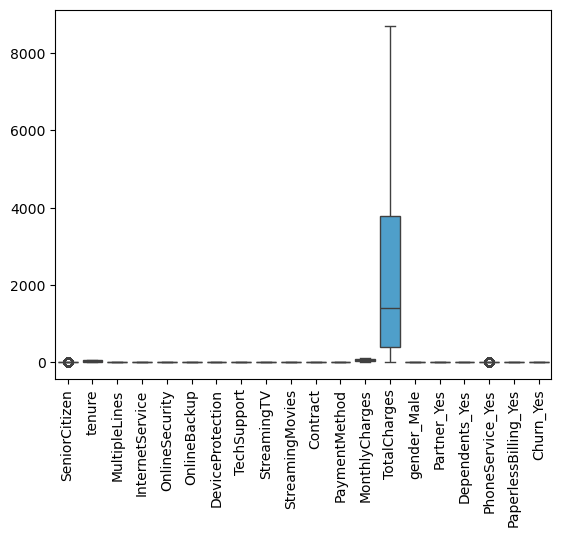

In [260]:
sns.boxplot(telcoen)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'SeniorCitizen'),
  Text(1, 0, 'tenure'),
  Text(2, 0, 'MultipleLines'),
  Text(3, 0, 'InternetService'),
  Text(4, 0, 'OnlineSecurity'),
  Text(5, 0, 'OnlineBackup'),
  Text(6, 0, 'DeviceProtection'),
  Text(7, 0, 'TechSupport'),
  Text(8, 0, 'StreamingTV'),
  Text(9, 0, 'StreamingMovies'),
  Text(10, 0, 'Contract'),
  Text(11, 0, 'PaymentMethod'),
  Text(12, 0, 'MonthlyCharges'),
  Text(13, 0, 'TotalCharges'),
  Text(14, 0, 'gender_Male'),
  Text(15, 0, 'Partner_Yes'),
  Text(16, 0, 'Dependents_Yes'),
  Text(17, 0, 'PhoneService_Yes'),
  Text(18, 0, 'PaperlessBilling_Yes'),
  Text(19, 0, 'Churn_Yes')])

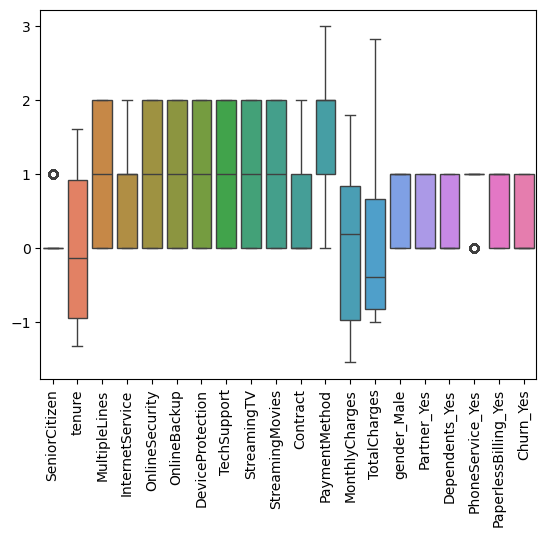

In [262]:
sns.boxplot(telcost)
plt.xticks(rotation=90)

<Axes: >

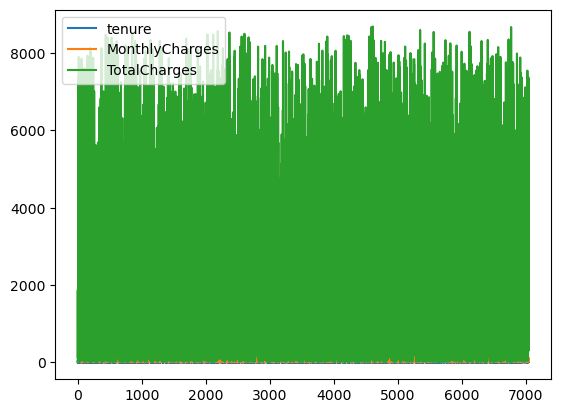

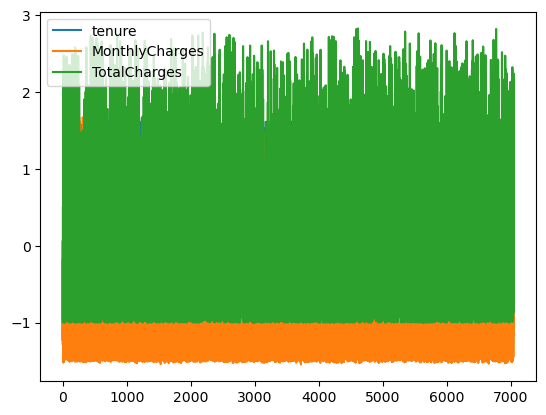

In [99]:
telcoen[['tenure', 'MonthlyCharges', 'TotalCharges']].plot(kind='line')
telcost[['tenure', 'MonthlyCharges', 'TotalCharges']].plot(kind='line')

In [100]:
#try GBM, Random forest, catboost, neural net, logit reg

In [101]:
#logistic regression

In [102]:
#selecting the the dependent variable
#churn is the output to be predicted
y_lr = telcost['Churn_Yes'].copy()
#selecting the independent variables for predicting heart disease
X_lr = telcost.drop(['Churn_Yes'], axis=1)

In [103]:
#view inputs
print(X_lr.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SeniorCitizen         7043 non-null   int64  
 1   tenure                7043 non-null   float64
 2   MultipleLines         7043 non-null   int32  
 3   InternetService       7043 non-null   int32  
 4   OnlineSecurity        7043 non-null   int32  
 5   OnlineBackup          7043 non-null   int32  
 6   DeviceProtection      7043 non-null   int32  
 7   TechSupport           7043 non-null   int32  
 8   StreamingTV           7043 non-null   int32  
 9   StreamingMovies       7043 non-null   int32  
 10  Contract              7043 non-null   int32  
 11  PaymentMethod         7043 non-null   int32  
 12  MonthlyCharges        7043 non-null   float64
 13  TotalCharges          7043 non-null   float64
 14  gender_Male           7043 non-null   bool   
 15  Partner_Yes          

In [104]:
#view outputs
print(y_lr.info())

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: Churn_Yes
Non-Null Count  Dtype
--------------  -----
7043 non-null   bool 
dtypes: bool(1)
memory usage: 7.0 KB
None


In [105]:
#splitting the dataset into test and train sets
X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X_lr, y_lr, test_size=0.1, random_state=42)

In [106]:
# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_lr_train, y_lr_train)

LogisticRegression()

In [107]:
#train logitrem
y_lr_pred = logreg.predict(X_lr_test)

In [108]:
#model evaluation

In [109]:
# Accuracy
print("Accuracy:", accuracy_score(y_lr_test, y_lr_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_lr_test, y_lr_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_lr_test, y_lr_pred))

Accuracy: 0.8184397163120567
Confusion Matrix:
 [[463  48]
 [ 80 114]]
Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.91      0.88       511
        True       0.70      0.59      0.64       194

    accuracy                           0.82       705
   macro avg       0.78      0.75      0.76       705
weighted avg       0.81      0.82      0.81       705



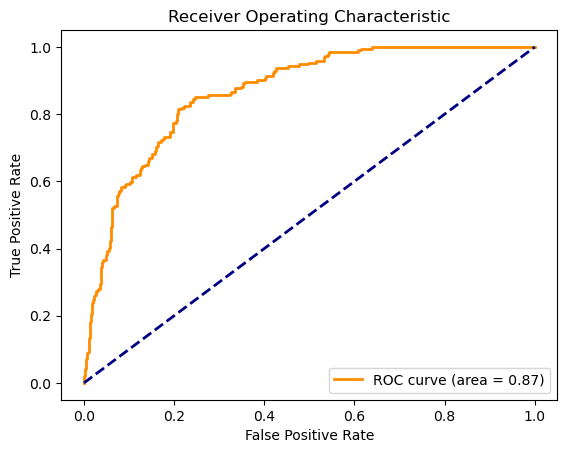

In [110]:
# ROC Curve
y_lr_pred_prob = logreg.predict_proba(X_lr_test)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_lr_test, y_lr_pred_prob)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [111]:
#gradient Boosting

In [112]:
#selecting the the dependent variable
#churn is the output to be predicted
y_gbm = telcost['Churn_Yes'].copy()
#selecting the independent variables for predicting heart disease
X_gbm = telcost.drop(['Churn_Yes'], axis=1)

In [113]:
#splitting the dataset into test and train sets
X_gbm_train, X_gbm_test, y_gbm_train, y_gbm_test = train_test_split(X_gbm, y_gbm, test_size=0.1, random_state=42)

In [114]:
# Initialize the Gradient Boosting model
gbm = GradientBoostingClassifier(n_estimators=550, learning_rate=0.01, max_depth=5, random_state=42)

# Train the model
gbm.fit(X_gbm_train, y_gbm_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=550,
                           random_state=42)

In [115]:
#vary the the gbm vals for better accur

In [116]:
#predictions
y_gbm_pred = gbm.predict(X_gbm_test)

In [117]:
#model Evaluation

In [118]:
# Accuracy
print("Accuracy:", accuracy_score(y_gbm_test, y_gbm_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_gbm_test, y_gbm_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_gbm_test, y_gbm_pred))

Accuracy: 0.8113475177304964
Confusion Matrix:
 [[465  46]
 [ 87 107]]
Classification Report:
               precision    recall  f1-score   support

       False       0.84      0.91      0.87       511
        True       0.70      0.55      0.62       194

    accuracy                           0.81       705
   macro avg       0.77      0.73      0.75       705
weighted avg       0.80      0.81      0.80       705



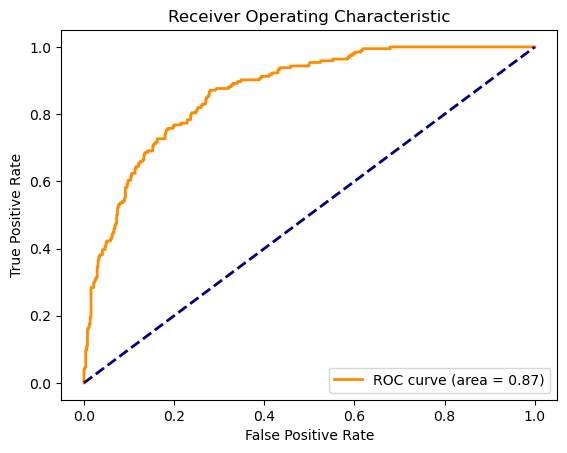

In [119]:
# ROC Curve
y_gbm_pred_prob = gbm.predict_proba(X_gbm_test)[:, 1]
fpr_gbm, tpr_gbm, thresholds_gbm = roc_curve(y_gbm_test, y_gbm_pred_prob)
roc_auc_gbm = auc(fpr_gbm, tpr_gbm)

plt.figure()
plt.plot(fpr_gbm, tpr_gbm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_gbm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [120]:
#Random Forest

In [121]:
#selecting the the dependent variable
#churn is the output to be predicted
y_rf = telcost['Churn_Yes'].copy()
#selecting the independent variables for predicting heart disease
X_rf = telcost.drop(['Churn_Yes'], axis=1)

In [122]:
#splitting the dataset into test and train sets
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

In [123]:
# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=500, random_state=42)

# Train the model
rf.fit(X_rf_train, y_rf_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [124]:
#predictions
y_rf_pred = rf.predict(X_rf_test)

In [125]:
# Accuracy
print("Accuracy:", accuracy_score(y_rf_test, y_rf_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_rf_test, y_rf_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_rf_test, y_rf_pred))

Accuracy: 0.7984386089425124
Confusion Matrix:
 [[947  89]
 [195 178]]
Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.91      0.87      1036
        True       0.67      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



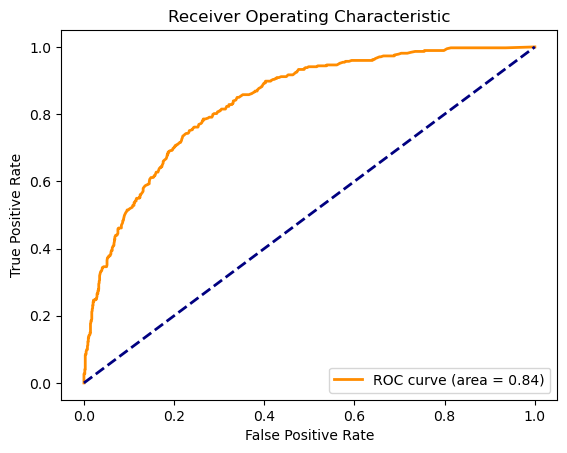

In [126]:
# ROC Curve
y_rf_pred_prob = rf.predict_proba(X_rf_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_rf_test, y_rf_pred_prob)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [127]:
#log reg is the best model after tuning

In [128]:
#save logreg
joblib.dump(logreg, 'churn_logreg.pkl')

['churn_logreg.pkl']